In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("analyzed.csv")

In [21]:
from sklearn.preprocessing import OneHotEncoder


In [22]:
spending_score_summary = df.groupby('Merchant Id')['Spending_Score'].agg(['mean', 'std', 'min', 'max'])


In [23]:
df_encoded = pd.get_dummies(df, columns=['City', 'Most_Purchased_Product', 'Cluster_Nature'])


In [24]:
X = df_encoded.drop(['Merchant Id', 'Repayment Score 1-5'], axis=1)
y = df_encoded['Repayment Score 1-5']
     

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
     

RandomForestClassifier(random_state=42)

In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
     

Accuracy: 0.75


In [27]:
feature_importances = model.feature_importances_

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

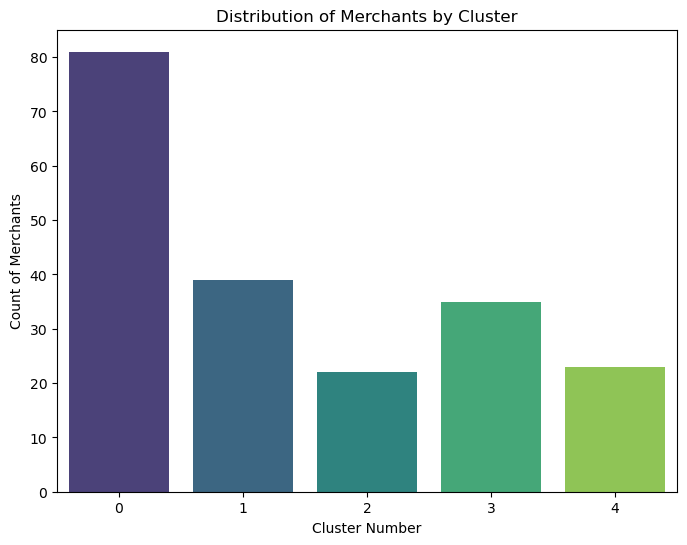

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_Number', data=df, palette='viridis')
plt.title('Distribution of Merchants by Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Count of Merchants')
plt.show()
     

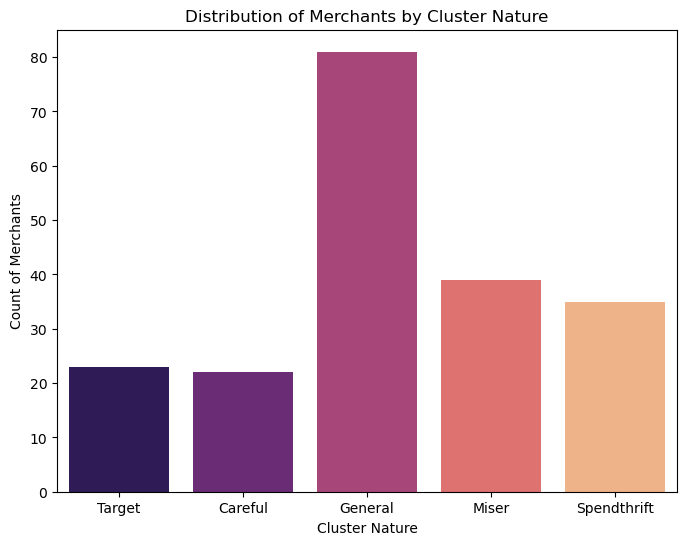

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster_Nature', data=df, palette='magma')
plt.title('Distribution of Merchants by Cluster Nature')
plt.xlabel('Cluster Nature')
plt.ylabel('Count of Merchants')
plt.show()